<a href="https://colab.research.google.com/github/RummanAli/FYP2022-KnowledgeVision/blob/main/ISIC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint

In [39]:
def inv_softmax(x):
    return tf.cast(tf.math.log(x), tf.float32) + tf.cast(tf.math.log(7.0), tf.float32)

In [40]:
import numpy as np
import keras
import tensorflow
class DataGenerator(tensorflow.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels,knowledge_res,knowledge_dense, batch_size=100, dim=(224,224), n_channels=3,
                 n_classes=7, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.knowledge_res = knowledge_res
        self.knowledge_dense = knowledge_dense
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        k_res = np.empty((self.batch_size,7), dtype=float)
        k_dense = np.empty((self.batch_size,7), dtype=float)
        y = np.empty((self.batch_size), dtype=int)
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample

            k_res[i] = self.knowledge_res['/curr_proj_datasets/ISIC 2019 7 classes' + ID]
            k_dense[i] = self.knowledge_dense['/curr_proj_datasets/ISIC 2019 7 classes' + ID]
            y[i] = self.labels[ID]
            
        return [inv_softmax(k_dense),inv_softmax(k_res)], tensorflow.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [41]:
'''
import pickle
train_dir = '/content/train'
test_dir = '/content/test'
img_list = os.listdir(train_dir)
img_list.sort()
list_IDs = []
labels = {}
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(train_dir,path)):
        final = os.path.join(train_dir,path,img)
        list_IDs.append(final)
        labels[final] = i

an_file2 = open("list_IDs_train", "wb")
pickle.dump(list_IDs, an_file2)
an_file2.close()

an_file = open("true_outputs_train", "wb")
pickle.dump(labels, an_file)
an_file.close()
        
img_list = os.listdir(test_dir)
img_list.sort()
list_IDs2 = []
labels2 = {}
for i,path in enumerate(img_list):
    for img in os.listdir(os.path.join(test_dir,path)):
        final = os.path.join(test_dir,path,img)
        list_IDs2.append(final)
        labels2[final] = i

an_file2 = open("list_IDs_test", "wb")
pickle.dump(list_IDs2, an_file2)
an_file2.close()

an_file = open("true_outputs_test", "wb")
pickle.dump(labels2, an_file)
an_file.close()
'''

'\nimport pickle\ntrain_dir = \'/content/train\'\ntest_dir = \'/content/test\'\nimg_list = os.listdir(train_dir)\nimg_list.sort()\nlist_IDs = []\nlabels = {}\nfor i,path in enumerate(img_list):\n    for img in os.listdir(os.path.join(train_dir,path)):\n        final = os.path.join(train_dir,path,img)\n        list_IDs.append(final)\n        labels[final] = i\n\nan_file2 = open("list_IDs_train", "wb")\npickle.dump(list_IDs, an_file2)\nan_file2.close()\n\nan_file = open("true_outputs_train", "wb")\npickle.dump(labels, an_file)\nan_file.close()\n        \nimg_list = os.listdir(test_dir)\nimg_list.sort()\nlist_IDs2 = []\nlabels2 = {}\nfor i,path in enumerate(img_list):\n    for img in os.listdir(os.path.join(test_dir,path)):\n        final = os.path.join(test_dir,path,img)\n        list_IDs2.append(final)\n        labels2[final] = i\n\nan_file2 = open("list_IDs_test", "wb")\npickle.dump(list_IDs2, an_file2)\nan_file2.close()\n\nan_file = open("true_outputs_test", "wb")\npickle.dump(labels2

In [42]:
import pickle
train_res = open("/content/drive/MyDrive/ISIC-2019/isicDNNRES152_v1_D512D23_trainable_bestTorch__KnowledgeTrains.pkl","rb")
test_res = open("/content/drive/MyDrive/ISIC-2019/isicDNNRES152_v1_D512D23_trainable_bestTorch__KnowledgeTests.pkl","rb")
train_dense = open("/content/drive/MyDrive/ISIC-2019/isicDNNDENSE169_v1_D512D23_trainable_bestTorch__KnowledgeTrains.pkl","rb")
test_dense = open("/content/drive/MyDrive/ISIC-2019/isicDNNDENSE169_v1_D512D23_trainable_bestTorch__KnowledgeTests.pkl","rb")
list_IDs = open("/content/drive/MyDrive/ISIC-2019/list_IDs_train.pkl","rb")
list_IDs_test = open("/content/drive/MyDrive/ISIC-2019/list_IDs_test.pkl","rb")
labels = open("/content/drive/MyDrive/ISIC-2019/true_outputs_train.pkl","rb")
labels2 = open("/content/drive/MyDrive/ISIC-2019/true_outputs_test.pkl","rb")
train_res_dict = pickle.load(train_res)
test_res_dict = pickle.load(test_res)
train_dense_dict = pickle.load(train_dense)
test_dense_dict = pickle.load(test_dense)
list_IDs_dict = pickle.load(list_IDs)
list_IDs_test_dict = pickle.load(list_IDs_test)
labels_dict = pickle.load(labels)
labels2_dict = pickle.load(labels2)

train_generator = DataGenerator(list_IDs_dict, labels_dict,train_res_dict,train_dense_dict)
validation_generator = DataGenerator(list_IDs_test_dict, labels2_dict,test_res_dict,test_dense_dict)

In [43]:
def knowledge_incorporated_model():#pretrained_model):    
    inputA = Input((7))
    inputB = Input((7))
    l1    = Add()([inputA,inputB])
    l1    = Dense(32)(l1)
    l2    = Activation('relu')(l1)
    l4    = Dense(64)(l2)
    l5    = Activation('relu')(l4)
    l6    = Dense(7)(l5)
    #l6    = Activation('softmax')(l6)
    l8    = Add()([l6,inputB])
    l9    = Activation('softmax')(l8)
    return Model(inputs=[inputA, inputB], outputs=l9)

In [44]:
opt_adam = tf.keras.optimizers.Adam(
    learning_rate=0.0010,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)

In [45]:
model_DNN_knowledge = knowledge_incorporated_model()
model_DNN_knowledge.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])
model_DNN_knowledge.fit_generator(train_generator,validation_data = validation_generator,epochs = 100,verbose = 2)
tf.keras.models.save_model(model_DNN_knowledge,'/content/drive/MyDrive/ISIC-2019/knowledge_model_logits2')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


209/209 - 1s - loss: nan - accuracy: 0.0369 - val_loss: nan - val_accuracy: 0.0322 - 1s/epoch - 7ms/step
Epoch 2/100
209/209 - 1s - loss: nan - accuracy: 0.0357 - val_loss: nan - val_accuracy: 0.0322 - 892ms/epoch - 4ms/step
Epoch 3/100
209/209 - 1s - loss: nan - accuracy: 0.0356 - val_loss: nan - val_accuracy: 0.0322 - 854ms/epoch - 4ms/step
Epoch 4/100
209/209 - 1s - loss: nan - accuracy: 0.0356 - val_loss: nan - val_accuracy: 0.0322 - 865ms/epoch - 4ms/step
Epoch 5/100
209/209 - 1s - loss: nan - accuracy: 0.0356 - val_loss: nan - val_accuracy: 0.0319 - 873ms/epoch - 4ms/step
Epoch 6/100
209/209 - 1s - loss: nan - accuracy: 0.0357 - val_loss: nan - val_accuracy: 0.0322 - 888ms/epoch - 4ms/step
Epoch 7/100
209/209 - 1s - loss: nan - accuracy: 0.0355 - val_loss: nan - val_accuracy: 0.0322 - 843ms/epoch - 4ms/step
Epoch 8/100
209/209 - 1s - loss: nan - accuracy: 0.0357 - val_loss: nan - val_accuracy: 0.0319 - 867ms/epoch - 4ms/step
Epoch 9/100
209/209 - 1s - loss: nan - accuracy: 0.0356

KeyboardInterrupt: ignored

In [11]:
from sklearn.metrics import classification_report
import pickle
#test_dense_dict = pickle.load(test_dense)
#labels2_dict = pickle.load(labels2)
#list_IDs_test_dict = pickle.load(list_IDs_test)
#test_res_dict = pickle.load(test_res)

model_logits = tf.keras.models.load_model("/content/drive/MyDrive/ISIC-2019/knowledge_model_softmax")

labels = []
preds_soft = []
preds_logit = []
know1 = []
know2 = [] 
for i,path in enumerate(list_IDs_test_dict):
  labels.append(labels2_dict[path])
  know_res = test_res_dict['/curr_proj_datasets/ISIC 2019 7 classes' +path]
  know_dense = test_dense_dict['/curr_proj_datasets/ISIC 2019 7 classes' +path]
  preds_logit.append(model_logits([know_dense,know_res]))
  know1.append(know_res)
  know2.append(know_dense)
report = classification_report(labels,np.argmax(preds_logit,axis = -1),output_dict=True)
report1 = classification_report(labels,np.argmax(know1,axis = -1),output_dict=True)
report2 = classification_report(labels,np.argmax(know2,axis = -1),output_dict=True)
import pandas
df = pandas.DataFrame(report).transpose()  
df1 = pandas.DataFrame(report1).transpose()  
df2 = pandas.DataFrame(report2).transpose()
df.to_csv('/content/drive/MyDrive/ISIC-2019/results.csv')  
df1.to_csv('/content/drive/MyDrive/ISIC-2019/resnet.csv')  
df2.to_csv('/content/drive/MyDrive/ISIC-2019/densenet.csv')  
print(df)
print(df1)
print(df2)  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000   119.000000
1              0.801724  0.933735  0.862709   498.000000
2              0.677333  0.711485  0.693989   357.000000
3              0.000000  0.000000  0.000000    36.000000
4              0.813115  0.729412  0.768992   680.000000
5              0.883372  0.952525  0.916646  1980.000000
6              0.000000  0.000000  0.000000    42.000000
accuracy       0.835399  0.835399  0.835399     0.835399
macro avg      0.453649  0.475308  0.463191  3712.000000
weighted avg   0.792851  0.835399  0.812300  3712.000000
              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000   119.000000
1              0.780034  0.925703  0.846648   498.000000
2              0.674931  0.686275  0.680556   357.000000
3              0.000000  0.000000  0.000000    36.000000
4              0.800336  0.701471  0.747649   680.000000
5              0.869565  0.9494

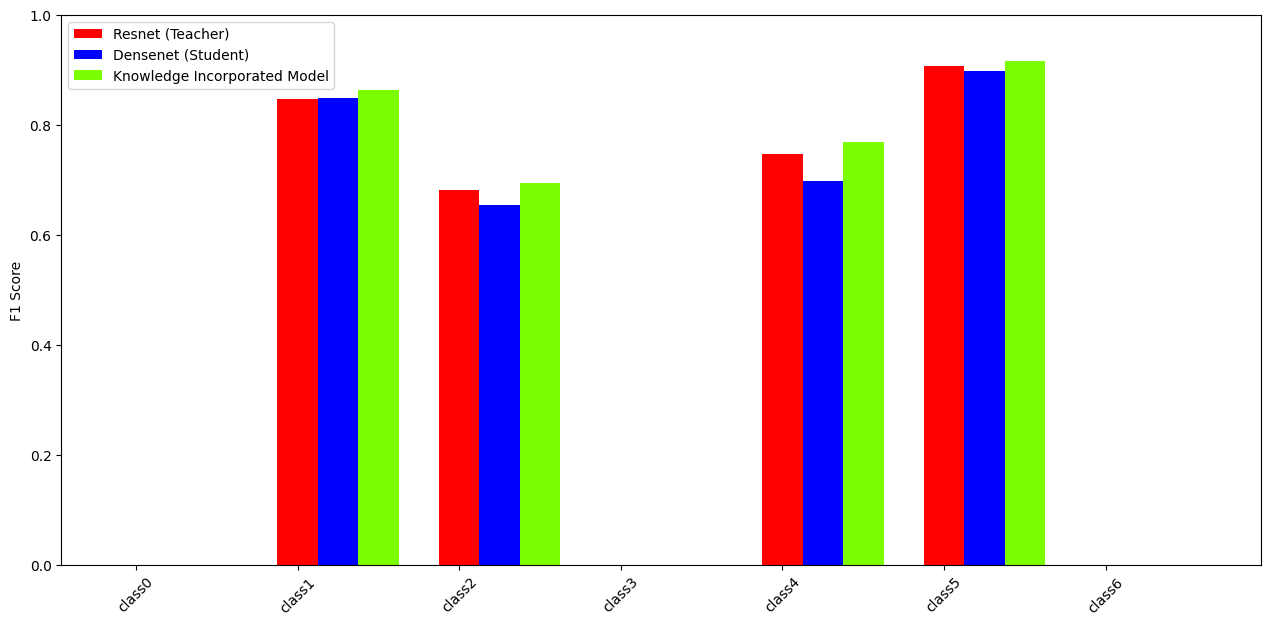

In [12]:
import numpy as np
import matplotlib.pyplot as plt
data = [[0,0.846648,0.680556,0,0.747649,0.907774,0],
[0,0.849624,0.65404,0,0.697306,0.897542,0],
[0,0.862709,0.693989,0,0.768992,0.916646,0]]

X = np.arange(7)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [12, 5.5]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_axes([0,0,1,1])
ax.set_ylim([0, 1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25, label = "Resnet (Teacher)")
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, label = "Densenet (Student)")
ax.bar(X + 0.5, data[2], color = 'lawngreen', width = 0.25, label = "Knowledge Incorporated Model")
ax.axes.xaxis.set_ticklabels([])
labels = ['class0', 'class1' ,'class2' ,'class3' ,'class4','class5','class6']
ax.set_xticks(X)
ax.set_xticklabels(labels,rotation = 45)
plt.ylabel('F1 Score')
plt.legend(loc= "best")

In [91]:
len(labels)

3712

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
#preds_logit
#know
#know2 
# Binarize the output
y = label_binarize(np.array(labels), classes=[0,1,2,3,4,5,6])
n_classes = y.shape[1]

y_score = np.reshape(np.array(preds_logit),(3712,7))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [94]:
y = label_binarize(labels, classes=[0,1,2,3,4,5,6])
n_classes = y.shape[1]

y_score = np.reshape(np.array(know1),(3712,7))

# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"]) 

In [95]:
y = label_binarize(labels, classes=[0,1,2,3,4,5,6])
n_classes = y.shape[1]

y_score = np.reshape(np.array(know2),(3712,7))

# Compute ROC curve and ROC area for each class
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()
for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])

# Compute micro-average ROC curve and ROC area
fpr3["micro"], tpr3["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

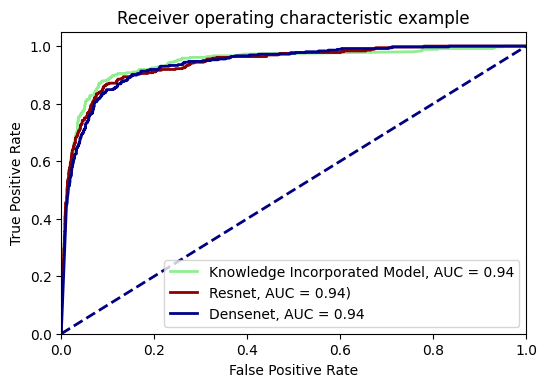

In [104]:
plt.figure()
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="lightgreen",
    lw=lw,
    label="Knowledge Incorporated Model, AUC = %0.2f" % roc_auc[2],
)
plt.plot(
    fpr2[2],
    tpr2[2],
    color="darkred",
    lw=lw,
    label="Resnet, AUC = %0.2f)" % roc_auc2[2],
)
plt.plot(
    fpr3[2],
    tpr3[2],
    color="darkblue",
    lw=lw,
    label="Densenet, AUC = %0.2f" % roc_auc3[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()